# Data Analysis and Visualization on Police Dataset

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

## Importing the dataset

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\police_dataset.csv')

## Finding all the null values and deleting those records

In [18]:
df.isnull().sum()

stop_date             0
stop_time             0
driver_gender         0
driver_age_raw        0
driver_age            0
driver_race           0
violation_raw         0
violation             0
search_conducted      0
stop_outcome          0
is_arrested           0
stop_duration         0
drugs_related_stop    0
dtype: int64

In [16]:
df.dropna(inplace=True)

## Dropping the country_name and search_type column permanently

In [12]:
#df.drop(columns = 'country_name', inplace = True)   # removing the column with drop
df.drop(columns = 'search_type', inplace = True)

In [72]:
df.rename(columns={'driver_age_raw': 'driver_DOB'}, inplace=True)

In [81]:
df

,stop_date,stop_time,driver_gender,driver_DOB,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,month,hour,minute
0,2005-01-02,2024-02-16 01:55:00,M,1985.0,20.0,White,Speeding,Speeding,No,Citation,No,7.5,No,1,1,55
1,2005-01-18,2024-02-16 08:15:00,M,1965.0,40.0,White,Speeding,Speeding,No,Citation,No,7.5,No,1,8,15
2,2005-01-23,2024-02-16 23:15:00,M,1972.0,33.0,White,Speeding,Speeding,No,Citation,No,7.5,No,1,23,15
3,2005-02-20,2024-02-16 17:15:00,M,1986.0,19.0,White,Call for Service,Other,No,Arrest Driver,Yes,15.0,No,2,17,15
4,2005-03-14,2024-02-16 10:00:00,F,1984.0,21.0,White,Speeding,Speeding,No,Citation,No,7.5,No,3,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,2012-12-06,2024-02-16 16:00:00,M,1994.0,18.0,White,Speeding,Speeding,No,Citation,No,7.5,No,12,16,0
65530,2012-12-06,2024-02-16 17:54:00,F,1987.0,25.0,White,Speeding,Speeding,No,Citation,No,7.5,No,12,17,54
65531,2012-12-06,2024-02-16 22:22:00,M,1954.0,58.0,White,Speeding,Speeding,No,Warning,No,7.5,No,12,22,22
65532,2012-12-06,2024-02-16 23:20:00,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,No,Citation,No,7.5,No,12,23,20


In [80]:
#df['search_conducted'].replace({False: 'No', True: 'Yes'}, inplace=True)
#df['is_arrested'].replace({False: 'No', True: 'Yes'}, inplace=True)
df['drugs_related_stop'].replace({False: 'No', True: 'Yes'}, inplace=True)

## no. of men and women in violation for speeding

In [5]:
df[df.violation == 'Speeding'].driver_gender.value_counts()  #for speeding,no. of men and women in violation

driver_gender
M    25517
F    11686
Name: count, dtype: int64

## gender result based on search conducted

In [6]:
df.groupby('driver_gender').search_conducted.sum()   #group by to see gender result based on search conducted

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

## explicitly giving values to stop_duration

In [7]:
df['stop_duration'] = df['stop_duration'].map({'0-15 Min' : 7.5,'16-30 Min' : 15, '30+ Min' : 45}) #changing type of values

In [8]:
df.stop_duration.mean()  #and now calculating the mean with new given values.

10.51139506132674

## violations with respect to driver age

In [9]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


## 1. Traffic Stops Over Months
### January and November have the most number of stoppage

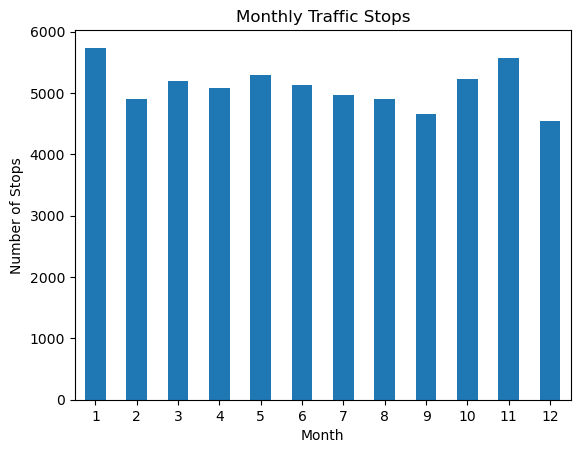

In [39]:
df['stop_date'] = pd.to_datetime(df['stop_date'])
df['month'] = df['stop_date'].dt.month
monthly_stops = df.groupby('month').size()
monthly_stops.plot(kind='bar', xlabel='Month', ylabel='Number of Stops', title='Monthly Traffic Stops')
plt.xticks(rotation=0)
plt.show()

## 2. Gender Distribution
### Significantly Males are been stopped more no. of times than Females.

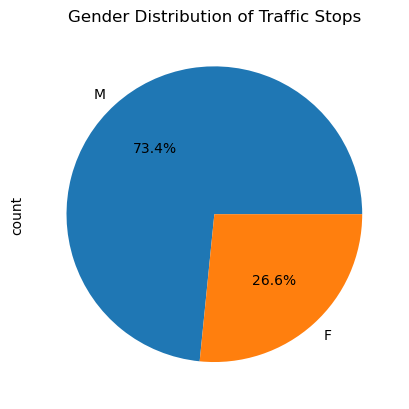

In [23]:
gender_distribution = df['driver_gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution of Traffic Stops')
plt.show()

## 3. Age Distribution
### The people from early twenties are been stopped more no. of times.

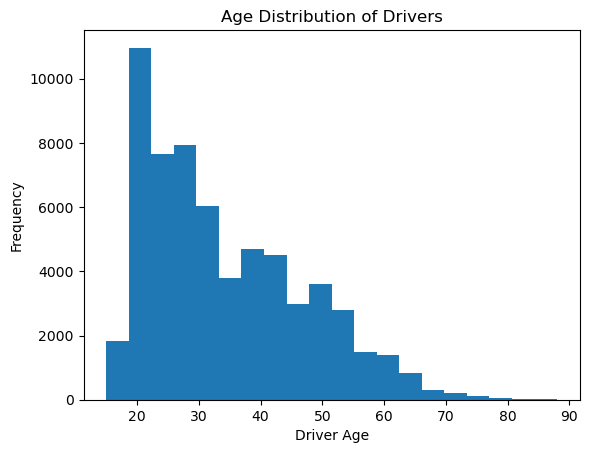

In [24]:
df['driver_age'].plot(kind='hist', bins=20, xlabel='Driver Age', ylabel='Frequency', title='Age Distribution of Drivers')
plt.show()

## 4. Ethnicity Distribution
### People from White group have been stopped more than the other ethnic groups.

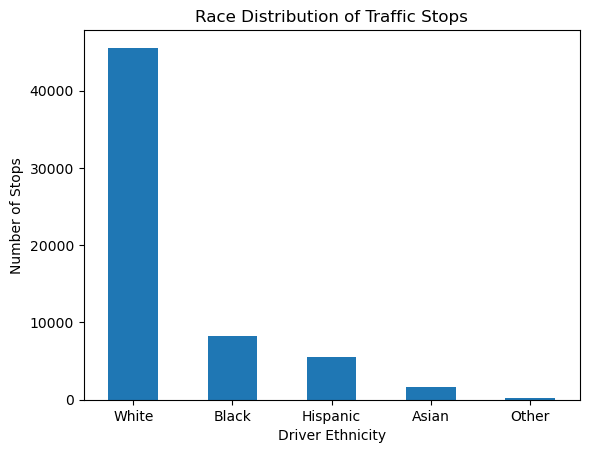

In [58]:
race_distribution = df['driver_race'].value_counts()
race_distribution.plot(kind='bar', xlabel='Driver Ethnicity', ylabel='Number of Stops', title='Race Distribution of Traffic Stops')
plt.xticks(rotation=0)
plt.show()

## 5. Violation Types
### Most common type of violation is Speeding.

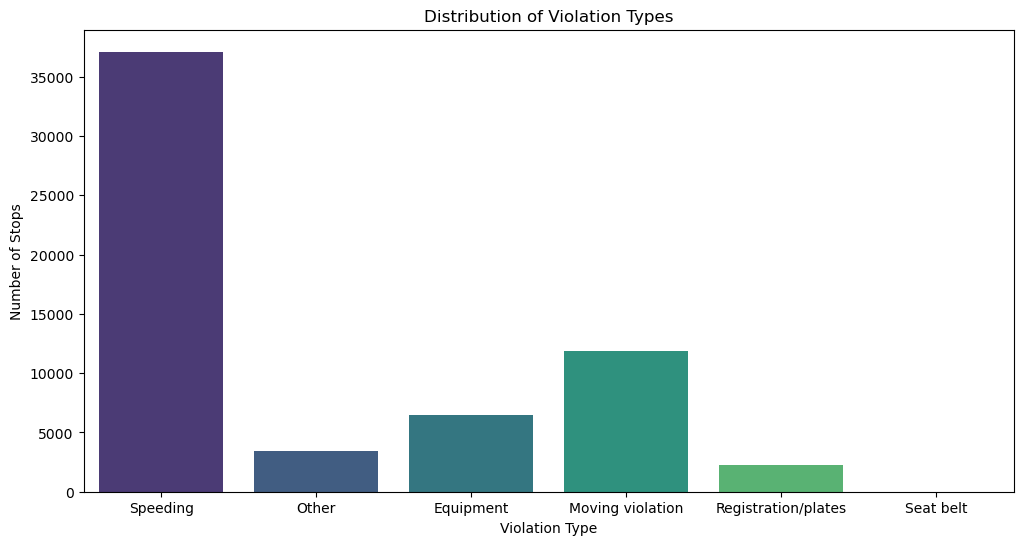

In [56]:
plt.figure(figsize=(12, 6))
sns.countplot(x='violation', data=df, palette='viridis')
plt.xlabel('Violation Type')
plt.ylabel('Number of Stops')
plt.title('Distribution of Violation Types')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
plt.show()

## 6. Search Conducted

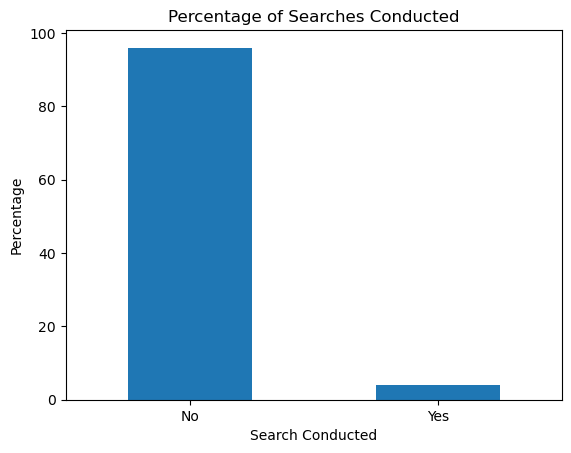

In [62]:
search_conducted_percentage = df['search_conducted'].value_counts(normalize=True) * 100
search_conducted_percentage.plot(kind='bar', xlabel='Search Conducted', ylabel='Percentage', title='Percentage of Searches Conducted')
plt.xticks(rotation=0)
plt.show()

## 7. Stop Outcomes
### Mostly the outcome came out to be Citation as a minor offense.

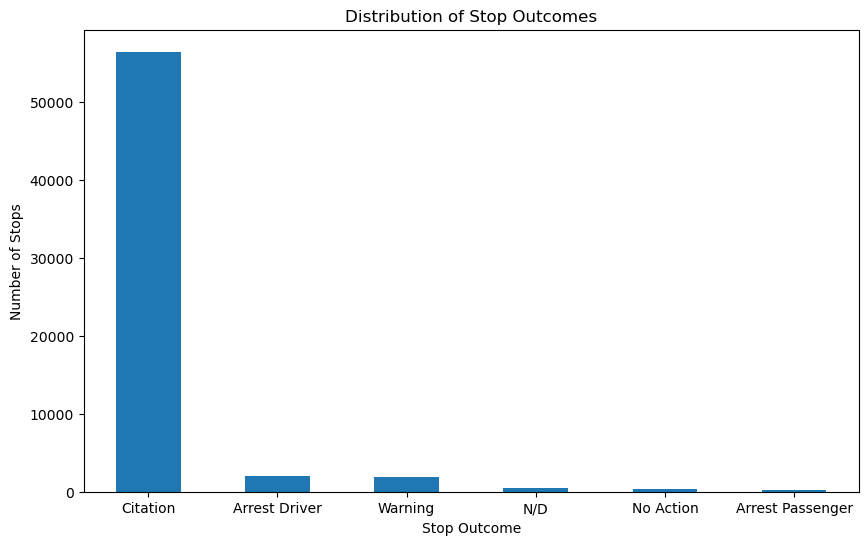

In [82]:
plt.figure(figsize=(10,6))
outcome_distribution = df['stop_outcome'].value_counts()
outcome_distribution.plot(kind='bar', xlabel='Stop Outcome', ylabel='Number of Stops', title='Distribution of Stop Outcomes')
plt.xticks(rotation=0,ha='center')
plt.show()

## 8. Arrests

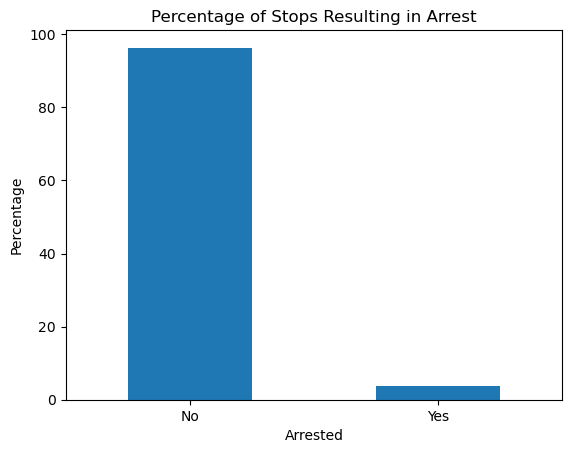

In [83]:
arrest_percentage = df['is_arrested'].value_counts(normalize=True) * 100
arrest_percentage.plot(kind='bar', xlabel='Arrested', ylabel='Percentage', title='Percentage of Stops Resulting in Arrest')
plt.xticks(rotation=0,ha='center')
plt.show()

## 9. Stop Duration
### most traffic stops typically last less than 10 minutes.

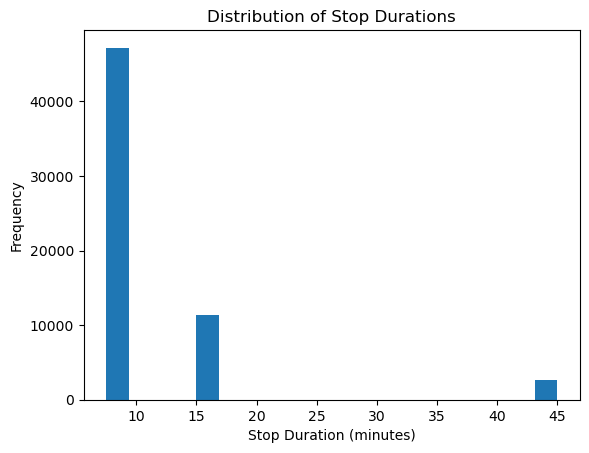

In [31]:
df['stop_duration'].plot(kind='hist', bins=20, xlabel='Stop Duration (minutes)', ylabel='Frequency', title='Distribution of Stop Durations')
plt.show()

## 10. Drugs-Related Stops

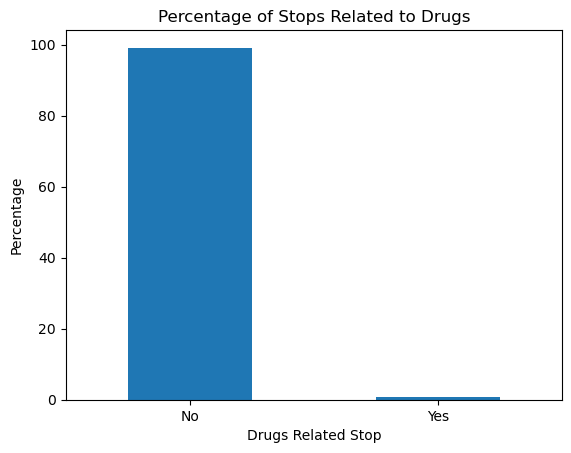

In [84]:
drugs_related_percentage = df['drugs_related_stop'].value_counts(normalize=True) * 100
drugs_related_percentage.plot(kind='bar', xlabel='Drugs Related Stop', ylabel='Percentage', title='Percentage of Stops Related to Drugs')
plt.xticks(rotation=0,ha='center')
plt.show()

## 11. Correlations with driver age and their stop outcome
### The red diamonds are the instances where the age of the driver is significantly unique from the rest of the group which typically points out the old age group with 70+ age here, while the box indicates the interquartile range, with the lower and upper edges representing the 25th and 75th percentiles, respectively.

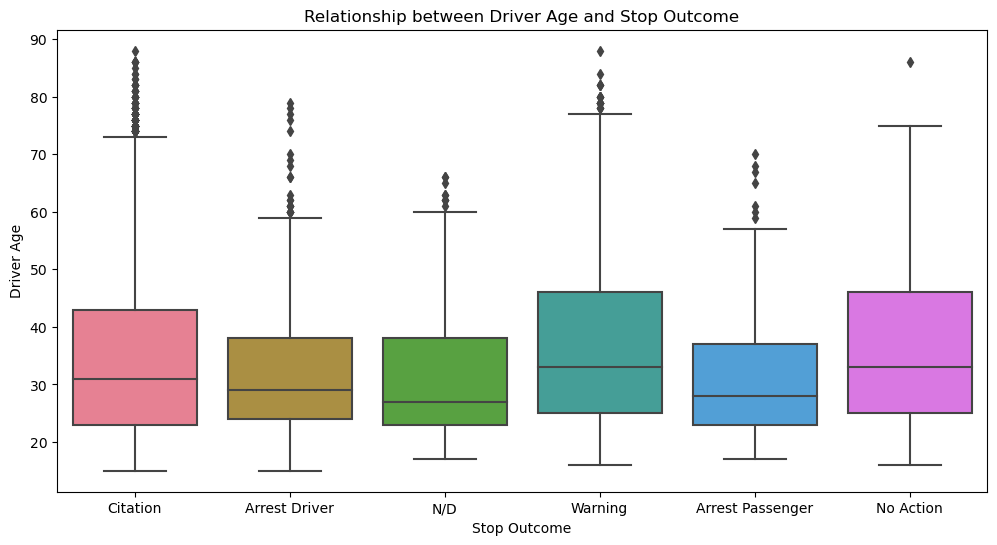

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='stop_outcome', y='driver_age', data=df, palette='husl')
plt.xlabel('Stop Outcome')
plt.ylabel('Driver Age')
plt.title('Relationship between Driver Age and Stop Outcome')
plt.xticks(rotation=0)
plt.show()


## 12. Time of Day Analysis
### morning 9am to 10am have more number of stoppages than the rest of the day.

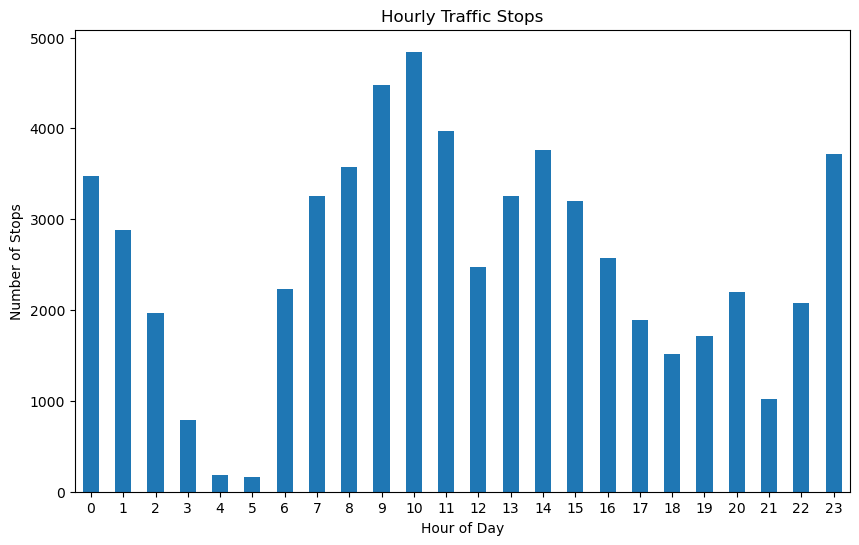

In [70]:
plt.figure(figsize=(10,6))
df['stop_time'] = pd.to_datetime(df['stop_time'])
df['hour'] = df['stop_time'].dt.hour
hourly_stops = df.groupby('hour').size()
hourly_stops.plot(kind='bar', xlabel='Hour of Day', ylabel='Number of Stops', title='Hourly Traffic Stops')
plt.xticks(rotation=0,ha='center')
plt.show()